#Dynamic Programming
+ 복잡한 문제를 간단한 여러 개의 문제로 나누어 푸는 방법
+ 부분 문제 반복과 최적 부분 구조를 가지고 있는 알고리즘을 일반적인 방법에 비해 더욱 적은 시간 내에 풀 때 사용  


+ 초기 상태 설정 및 점화식 세우는 것이 핵심  
$\rightarrow$ 계산된 값들을 기록해(memoization) 다음 계산에 사용한다.  
$\ $

+ 구현 방식  
1) Top-down (재귀)  
2) Bottom-up (반복)

#G3 1516번: 게임 개발
숌 회사에서 이번에 새로운 전략 시뮬레이션 게임 세준 크래프트를 개발하기로 하였다. 핵심적인 부분은 개발이 끝난 상태고, 종족별 균형과 전체 게임 시간 등을 조절하는 부분만 남아 있었다.

게임 플레이에 들어가는 시간은 상황에 따라 다를 수 있기 때문에, 모든 건물을 짓는데 걸리는 최소의 시간을 이용하여 근사하기로 하였다. 물론, __어떤 건물을 짓기 위해서 다른 건물을 먼저 지어야 할 수도 있기 때문에 문제가 단순하지만은 않을 수도 있다.__ 예를 들면 __스타크래프트에서 벙커를 짓기 위해서는 배럭을 먼저 지어야 하기 때문에, 배럭을 먼저 지은 뒤 벙커를 지어야 한다. 여러 개의 건물을 동시에 지을 수 있다.__

편의상 자원은 무한히 많이 가지고 있고, 건물을 짓는 명령을 내리기까지는 시간이 걸리지 않는다고 가정하자.

+ 입력  
__첫째 줄에 건물의 종류 수 N(1 ≤ N ≤ 500)이 주어진다. 다음 N개의 줄에는 각 건물을 짓는데 걸리는 시간과 그 건물을 짓기 위해 먼저 지어져야 하는 건물들의 번호__가 주어진다. 건물의 번호는 1부터 N까지로 하고, 각 줄은 -1로 끝난다고 하자. 각 건물을 짓는데 걸리는 시간은 100,000보다 작거나 같은 자연수이다. 모든 건물을 짓는 것이 가능한 입력만 주어진다.  

+ 출력  
__N개의 각 건물이 완성되기까지 걸리는 최소 시간__

#위상정렬 (Topological sort)  
: 비순환 방향 그래프(DAG)에서 정점을 선형으로 정렬하는 것  
$\ $  그래프가 DAG가 아닌 경우 그래프에 대한 위상 정렬은 불가능하다.
+ 비순환 방향 그래프 (DAG: Directed Acyclic Graph)  
: 사이클이 없는 방향 그래프
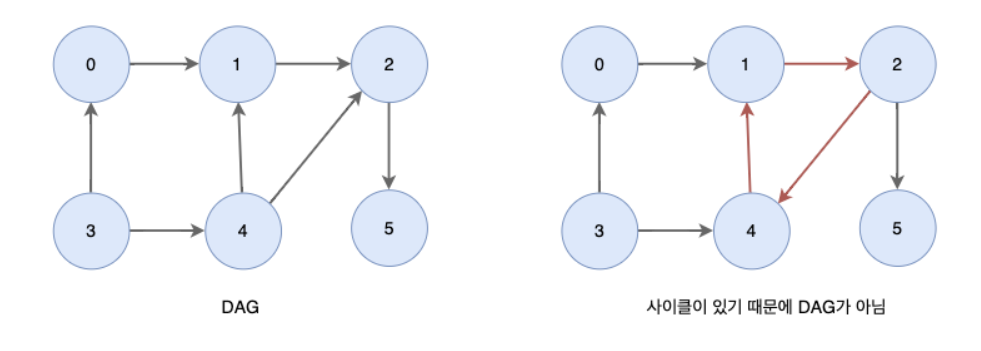

+ 위상정렬 구현 방법  
1) in_degree를 사용하는 BFS(Breath First Search) 방법  
: 모든 정점의 in_degree를 설정 후 in_degree가 0인 정점들을 큐에 넣은 후 방문처리  
$\rightarrow$ 큐에서 꺼내온 노드가 가리키는 정점 중 방문하지 않은 정점에 대한 차수를 1 감소시킴  
$\rightarrow$ 차수가 0인 정점을 큐에 넣고 방문 처리  

  시간복잡도:  
  정점의 수가 V, 간선의 수가 E일 때  
  인접리스트를 사용하는 경우 $O(V+E)$, 인접 행렬을 사용하는 경우 $O(V^2)$  
$ $  
2)  DFS(Depth First Search)를 사용하는 방법  
: in_degree 사용 x
: 임의의 방문하지 않은 한 정점을 잡고 DFS를 수행하면서 방문하는 정점들을 스택에 담음  
$\rightarrow$ 모든 정점의 방문될 때까지 1번을 반복  
$\rightarrow$ 모든 정점을 방문했다면 스택에 담긴 정점들을 출력

이재원  
:  위상정렬(BFS)  
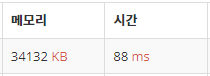

In [ ]:
import sys
from collections import deque
input = sys.stdin.readline

n=int(input()) #건물 개수 입력받음
degree=[0 for _ in range(n+1)] #차수 저장
time=[0 for _ in range(n+1)] #건물 짓는데 걸리는 시간
graph=[[] for _ in range(n+1)] #그래프 정보 저장
dp=[0 for _ in range(n+1)] #dp 배열

for i in range(1, n+1):
    tmp=list(map(int, input().split()))[:-1] #마지막 입력 제외하고 저장
    time[i]=tmp[0] #건물 짓는데 걸리는 시간 저장
    for j in tmp[1:]:
        graph[j].append(i) #그래프 연결 정보 저장
        degree[i]+=1 #차수 갱신 

def topology_sort(): #위상정렬 알고리즘 사용
    q=deque()
    for i in range(1,n+1):
        if degree[i]==0: #차수 0인 노드를 큐에 삽입
            q.appendleft(i)
    
    while q: #큐 빌 때까지
        node=q.pop()
        dp[node]+=time[node] #시간 정보 갱신
        for i in graph[node]: #다음에 지어지는 건물들 
            degree[i]-=1 #차수 갱신
            dp[i]=max(dp[i], dp[node]) #지금까지 지어진 건물 짓는데 걸린 시간과 비교해 더 큰 값으로 갱신
            if degree[i]==0: #차수 0이 됐으면 큐에 삽입
                q.appendleft(i)
                
topology_sort()
for i in range(1,n+1):
    print(dp[i])

이기정  
: 위상정렬(BFS)  
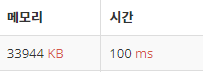

In [ ]:
import heapq

if __name__ == "__main__":

    N = int(input())
    dp = [None for _ in range(N + 1)]
    graph = [[] for _ in range(N + 1)]
    w = [0 for _ in range(N + 1)]
    hq = []
    ts = []

    # 입력 데이터
    for i in range(1, N + 1):
        lists = list(map(int, input().split()))
        dp[i] = lists[0]
        for j in range(len(lists) - 2):
            graph[i].append(lists[j + 1])
            w[lists[j + 1]] += 1

    # 위상 정렬
    for i in range(1, N + 1):
        if w[i] == 0:
            heapq.heappush(hq, i)

    while hq:
        node = heapq.heappop(hq)
        ts.append(node)
        for next_node in graph[node]:
            w[next_node] -= 1
            if w[next_node] == 0:
                heapq.heappush(hq, next_node)

    # dp
    while ts:
        node = ts.pop()
        node_val = dp[node]
        for next_node in graph[node]:
            dp[node] = max(dp[node], node_val + dp[next_node])

    # 출력
    for i in range(1, N + 1):
        print(dp[i])

김민성  
: 위상정렬(BFS)  
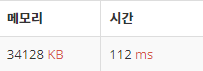

In [ ]:
from collections import deque

N=int(input()) # 건물의 종류 수
Cost=[0]*(N+1)
indegree=[0]*(N+1)
dp=[0]*(N+1)
graph=[[] for _ in range((N+1))]
for i in range(1,N+1):
    tmp = list(map(int, input().split()))
    Cost[i]=tmp[0]
    for j in range(1, len(tmp)):
        a=tmp[j] # 먼저 지어져야 하는 건물의 번호
        if a==-1:
            break
        indegree[i]+=1
        graph[a].append(i)


def Solve(): # Topology 응용
    q=deque()
    for i in range(1,N+1): # 진입차수 0인것 부터 q에 넣음
        if indegree[i]==0:
            q.append(i)

    while q:
        Cur=q.popleft()
        dp[Cur]+=Cost[Cur]
        for Next in graph[Cur]:
            dp[Next]=max(dp[Next], dp[Cur])
            indegree[Next]-=1
            if indegree[Next]==0:
                q.append(Next)

Solve()
for i in range(1,N+1):
    print(dp[i])

최정원  
: 위상정렬(BFS)  
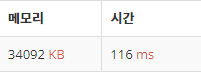

In [ ]:
from collections import deque

N = int(input())
graph = [[] for _ in range(N + 1)]
inDegree = [0] * (N + 1)
time = [0] * (N + 1)
result = [0] * (N + 1)
for a in range(1, N + 1):
    time[a], *temp = map(int, input().split())
    for b in temp[:-1]:
        inDegree[a] += 1
        graph[b].append(a)

q = deque([])
for i in range(1, N + 1):
    if inDegree[i] == 0:
        result[i] = time[i]
        q.append(i)

while q:
    now = q.popleft()
    for next in graph[now]:
        inDegree[next] -= 1
        result[next] = max(result[next], result[now] + time[next])
        if inDegree[next] == 0:
            q.append(next)


for i in range(1,N+1):
    print(result[i])

권소예  
: 위상정렬(BFS)  
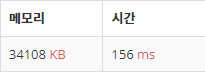

In [ ]:
import sys
from collections import deque

input = sys.stdin.readline

queue = deque()
N = int(input())

cnt = [0] * (N + 1)
cost = [0] * (N + 1)
graph = [[0] * (N + 1) for _ in range(N + 1)]

for i in range(1, N + 1):
    tmp = list(map(int, input().split()))
    cost[i] = tmp[0]
    for x in tmp[1:-1]:
        graph[i][x] = 1
        cnt[i] += 1

for i in range(1, N + 1):
    if cnt[i] == 0:
        queue.append(i)

while queue:
    x = queue.popleft()
    t = 0
    for i in range(1, N + 1):
        if graph[i][x] == 1:
            cnt[i] -= 1
            if cnt[i] == 0:
                queue.append(i)
        if graph[x][i] == 1:
            t = max(cost[i], t)
    cost[x] += t

for i in range(1, N + 1):
    print(cost[i])

박민준  
: 위상정렬(BFS)  
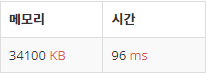

In [ ]:
# 1516: 게임 개발
# https://www.acmicpc.net/problem/1516
# 위상정렬 사용
import sys
from collections import deque

N = int(sys.stdin.readline())

cost, require, inD = [], [[] for i in range(N)], [0 for i in range(N)]
for i in range(N):
    tmp = list(map(int, sys.stdin.readline().split()))[:-1]
    cost.append(tmp[0])
    for j in tmp[1:]:
        require[j-1].append(i) # 건물 i가 어떤 건물에 필요한지 기록
        inD[i] += 1 # 위상정렬 차수
        
ans = [0 for i in range(N)]

q = deque()
for i in range(N):
    if(inD[i] == 0):
        q.append(i)
        
while q:
    now = q.popleft()
    ans[now] += cost[now]
    for b in require[now]:
            inD[b] -= 1
            # b번호 건물을 짓기 전에 먼저 지어야하는 선수 건물 짓는데 걸리는 시간으로 갱신
            ans[b] = max(ans[b], ans[now])
            if inD[b] == 0:
                q.append(b)

for i in range(N):
    print(ans[i])

박태진

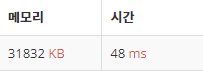

In [ ]:
import sys

num = int(sys.stdin.readline())
constructure = [[0, (-1,)]]  # 초기 0번째 더미 값 설정.

for i in range(num):
    temp = tuple(map(int, sys.stdin.readline().split()))
    constructure.append([temp[0], temp[1:]])

dp = [0] * len(constructure)  # 건물 수 만큼의 dp table 만듦.


def time(i):  # dp memoization
    if dp[i] != 0:  # dp table이 0이 아니면 반환
        return dp[i]

    if constructure[i][1][0] == -1:  # i번째 건물이 조건 없이 지어질 수 있다면 dp[i]에 건물의 시간을 저장 후 반환
        dp[i] = constructure[i][0] #건물 짓는 데 걸리는 시간 저장
        return dp[i]

    max_ = 0
    for j in constructure[i][1][:-1]:  # i번째 건물의 조건(먼저 지어져야 하는 건물 짓는데 걸리는 시간)을 탐색하면서 제일 오래 걸리는 값을 max_에 저장
        max_ = time(j) if time(j) > max_ else max_

    dp[i] = max_ + constructure[i][0]  # 앞에서 구한 최대 시간 값과 자신의 건물 짓는데 걸리는 시간을 더함
    return dp[i]


for i in range(len(dp)):  # 건물 번호마다 돌면서 time을 진행
    time(i)

print("\n".join(map(str, dp[1:])))  # 출력

#입력 단계 등에서 차수 확인 및 계산 단계 없음

강윤석  
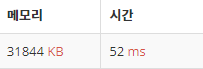

In [ ]:
"""
option + shift + f = autopep8
"""

import sys


def get_input():
    return sys.stdin.readline().strip()


def input_to_list(input):
    return list(map(int, input.split()))


def process_input():
    # sys.stdin = open("input.txt", "r")  # 제출 시에 해당 코드 주석처리

    global num_of_buildings, building_info_list
    building_info_list = [[0, -1]]
    num_of_buildings = int(get_input()) #건물 수 입력받음

    for i in range(num_of_buildings): 
        building_info_list.append(input_to_list(get_input())) #이전에 지어져야 하는 건물 목록 저장

def get_cost(cost_list, idx): #idx번째 건물 짓는 데 걸리는 총 시간 계산 함수
    global building_info_list, construction_info_list
    if cost_list[idx] == -1: #건물 짓는데 걸리는 시간 정보 없으면
        total = building_info_list[idx][0] #idx번째 건물 짓는 데 걸리는 시간 변수에 저장

        max = 0 #제일 오래 걸리는 것 저장 위함
        for p_idx in range(1, len(building_info_list[idx])): #먼저 지어져야 하는 건물들 확인
            current_idx = building_info_list[idx][p_idx] #먼저 지어져야 하는 건물 번호 뽑아옴
            if current_idx == -1: #먼저 지어져야 하는 건물 정보 전부 다 돌았으면
                break #break

            cur_cost = get_cost(cost_list, current_idx) #먼저 지어져야 하는 건물 짓는 데 걸리는 총 시간 계산 
            if max < cur_cost: #현재 max값이 계산된 값보다 작으면
                max = cur_cost #max값 갱신
        total += max #idx번째 건물 짓는 데 걸린 총 시간 계산
        cost_list[idx] = total #시간 정보 저장

    return cost_list[idx]


if __name__ == "__main__":
    process_input()
    INF = sys.maxsize
    '''
    코드 입력
    '''
    global construction_info_list
    construction_cost_list = [-1] * (num_of_buildings + 1) #건물 짓는데 걸리는 시간 저장
    construction_info_list = [None] * (num_of_buildings + 1) #먼저 지어져야 하는 건물들 정보 저장

    for i in range(1, num_of_buildings + 1): #각 건물들에 대해 반복
        print(get_cost(construction_cost_list, i)) #현재 건물 번호와 건물 짓는데 걸리는 시간 저장된 배열 전달해 cost 계산

#G2 2515번: 전시장
전시장에서 그림을 판매하는 업체에 하나의 전시대가 배정된다. 전시될 그림은 직사각형의 모양을 가지고 있고, 그림의 높이는 다를 수 있지만 폭은 모두 동일하다고 가정한다. 각 그림에는 가격이 매겨져 있다.  
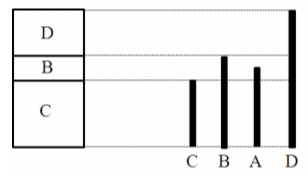

업체는 그림들을 관람객에게 보이기 위해 전시대에 배치하는데, __전시대의 폭이 그림의 폭과 동일하여 겹쳐서 배치해야만 한다.__ 예를 들어, 위의 그림은 전시대에 네 개의 그림 A, B, C, D를 C, B, A, D의 순서로 겹쳐서 배치한 상황을 보여준다.

위 그림의 오른쪽 부분은 전시된 그림들의 배치를 옆에서 본 모양을 나타내고, 왼쪽 부분은 배치한 그림들을 앞에서 보아서 관람객들이 보게 될 모양을 나타낸다. 그림 A는 앞의 그림 B때문에 가려져서 관람객에게 전혀 보이지 않고, 부분적으로라도 보이는 그림은 B, C, D 뿐이다. 

__보이는 부분의 세로 길이가 특정 정수 S이상인 그림만 관람객이 관심을 보이고 사게 된다고 가정__한다. 전시된 그림들 중 __보이는 부분의 세로 길이가 S이상인 그림을 판매가능 그림__이라고 부른다. 

그림의 높이와 가격이 주어질 때, __판매가능 그림들의 가격의 합이 최대가 되도록 그림을 배치할 때, 그 최대합을 구하는 프로그램__을 작성하시오. 

+ 입력  
첫째 줄에는 그림의 개수 N (1 ≤ N ≤ 300,000)과 판매가능 그림을 정의하는 1이상의 정수 S가 빈칸을 사이에 두고 주어진다. 다음 이어지는 N개의 줄 각각에는 한 그림의 높이와 가격을 나타내는 정수 H와 C가 빈칸을 사이에 두고 주어진다. 단, __1 ≤ S ≤ H ≤ 20,000,000, 1 ≤ C ≤ 1,000__이다. 

+ 출력  
__첫째 줄에 판매가능 그림들의 가격의 합이 최대가 되도록 배치했을 때 그 최대 합__

In [ ]:
#시간초과 코드
#높이 중복되는 그림들에 대한 가격 정보가 하나만 존재해야 한다 생각해서 딕셔너리 활용했으나,
#입력 범위, in 연산, 이중 for문 등으로 인해 시간초과가 난듯 함

import sys
input = sys.stdin.readline

N, S=map(int, input().split())
dict={} #그림 높이: 가격으로 저장

for i in range(N):
    height, cost=map(int, input().split()) #높이, 가격 입력받음
    if height not in dict: #딕셔너리에 없으면
        dict[height]=cost
    else: #이미 정보 있는 경우
        if cost>dict[height]:
            dict[height]=cost #가격 더 비쌀 때만 정보 갱신
            
dict=sorted(dict.items(), reverse=True) #높이 기준으로 정렬(내림차순)

dp=[0 for _ in range(len(dict))]

dp[0]=dict[0][1] #초기값 지정(가격 정보 저장)
status=0 #마지막으로 포함한 그림 인덱스

for i in range(1, len(dict)):
    for j in range(status, len(dict)):
        if dict[j][0]-dict[i][0]>=S: #그림 판매 가능한 경우
            if (dp[i]<dp[j]+dict[i][1]): #계산된 값이 더 비싼 경우
                status=j #마지막으로 포함한 그림 정보 갱신
                dp[i]=dp[j]+dict[i][1] #가격 계산

print(dp[-1])

+ 이분탐색
: __정렬되어 있는 리스트__에서 탐색 범위를 절반씩 좁혀가며 데이터를 탐색하는 방법

이재원  
: 이분탐색  
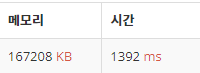

In [ ]:
#이분탐색 사용해 시간초과 해결

import sys
input = sys.stdin.readline

N, S=map(int, input().split()) #그림 개수, s 입력받음
pictures=[list(map(int, input().split())) for _ in range(N)]  #높이, 가격 정보 저장 리스트
pictures.sort() #오름차순으로 정렬
            
dp=[0] #DP 배열. 그림 번호에 해당하는 인덱스에 가격 정보 저장되도록 함

def upper_bound(height): #이분탐색
    left=0
    right=N-1
    
    while left<right:
        mid=(left+right)//2
        if pictures[mid][0]<=height: #찾는 값이 mid 인덱스 그림의 높이보다 크면
            left=mid+1 #왼쪽으로 탐색
        else: #찾는 값이 mid 인덱스 그림의 높이보다 작으면
            right=mid #오른쪽으로 탐색
    return right #조건 만족하는 그림 중에서 가장 높이가 낮은 그림의 인덱스

for i in range(N):
    idx=upper_bound(pictures[i][0]-S) #조건 만족하는 그림 중 가장 높이 낮은 그림의 인덱스 리턴받음
    dp.append(max(dp[i], dp[idx]+pictures[i][1])) #기존에 저장되어있던 값과 현재 그림 포함하는 경우 가격 비교해 최대값 append
    
print(dp[N])

이기정  
: 이분탐색  
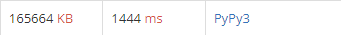

In [ ]:
def binary_serach(left, right, target): #'가격'정보가 리턴됨
    if dp[left][0] > target: #찾는 높이보다 left인덱스 그림의 높이가 높은 경우(조건 미충족)
        return 0

    if left == right:
        return dp[left][1]

    if left + 1 == right:
        if dp[right][0] > target:
            return dp[left][1]

        return dp[right][1]

    mid = (left + right) // 2
    if dp[mid][0] <= target: #찾는 값이 오른쪽에 있는 경우
        return binary_serach(mid, right, target) #재귀 사용해 이분탐색 구현
    else:
        return binary_serach(left, mid - 1, target)


if __name__ == "__main__":

    N, S = map(int, input().split())
    dp = []

    # 입력 데이터
    for i in range(N):
        H, C = map(int, input().split())
        dp.append([H, C])

    dp.sort()
    for i in range(1, len(dp)):
        val = binary_serach(0, i - 1, dp[i][0] - S) #dp[i][0]에는 i번째 그림의 높이 저장되어있음. 이분 탐색 범위 매 번 바뀜
        dp[i][1] = max(val + dp[i][1], dp[i - 1][1]) #dp[i][1]에 갱신된 가격 정보 저장

    print(dp[-1][1])

박민준  
: 매개변수 탐색  
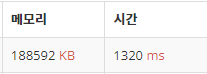

+ 매개변수 탐색  
: 이진 탐색(이분 탐색)과 유사   
: 조건을 만족하는 최대값을 구하는 방법  
: 최적화 문제(어떠한 함수값을 최적화시키는 변수를 찾는 문제)를 "결정 문제"로 풀 수 있는 알고리즘  
: 시간 복잡도(Time complexity): O(log N)

In [ ]:
import sys

def search(height, currentp, s): # 매개변수 탐색
    start = 0
    end = currentp
    mid = (start + end) // 2
    while start + 1 < end:
        if s[mid][0] > height:
            end = mid
            mid = (start + end) // 2
        else:
            start = mid
            mid = (start + end) // 2
    
    return start
N, S = map(int, sys.stdin.readline().split())

a = []
for i in range(N):
    a.append(list(map(int, sys.stdin.readline().split())))
    
a.sort(key= lambda x:(x[0], -x[1]))
s = [0 for i in range(N)]
s[0] = a[0]

for i in range(1, N):
    if a[i][0] >= s[i-1][0] + S: # i번째 그림은 판매 가능한 그림
        s[i] = [a[i][0], s[i-1][1] + a[i][1]]
    else: # i번째 그림은 판매 불가능한 그림
        p = search(a[i][0]-S, i-1, s) # 매개변수 탐색
        
        if a[i][0] < s[p][0] + S: #찾은 매개변수가 조건에 안맞으면
            s[i] = max(s[i-1], a[i], key= lambda x:x[1]) # 현재 그림과 이전값 비교
        else:
            s[i] = max([a[i][0], s[p][1] + a[i][1]], s[i-1], key= lambda x:x[1]) # 선택하지 않거나 이전값, i번째 그림 중 최대값
        
print(s[N-1][1])

김민성  
: lim 배열 사용  
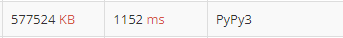

In [ ]:
# Input
N, S= map(int,input().split())
v=[]
v.append([0,0])
for i in range(N):
    Height, Cost = map(int, input().split())
    v.append([Height, Cost])
# Height 기준으로 Sort
v.sort()
dp = [0]*(N+1) # 각 index별 가질 수 있는 최대 Cost 저장
lim = [0]*(N+1) # 각 index별 S 이상 차이를 가지는 최대 index 저장

# lim에 해당 index 저장
for i in range(1, N+1):
    Cur = v[i][0] # 현재 index의 height
    left = 1
    right = i-1
    t = 0 # 현재 index에서 S 이상 차이를 가지는 최대 index 저장
    while left<=right:
        mid = int((left+right)/2)
        if Cur - v[mid][0] >= S:
            t=max(t, mid)
            left = mid+1
        else:
            right = mid-1
    lim[i]=t
# i를 포함하는 경우와 미포함 하는 경우의 점화식을 코드로 구현
for i in range(1,N+1):
    dp[i] = max(dp[i-1], dp[lim[i]] + v[i][1])

print(dp[N])

강윤석  
:  
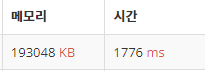

In [ ]:
#for문 돌려 조건 확인
"""
문제: 전시장(2515번)
---
option + shift + f = autopep8
"""

import sys
import heapq


def get_input():
    return sys.stdin.readline().strip()


def input_to_list(input):
    return list(map(int, input.split()))


def process_input():
    # sys.stdin = open("input.txt", "r")  # 제출 시에 해당 코드 주석처리
    """
    N: 1 <= N <= 300,000
    """
    global num_of_pics, pic_size, input_list
    num_of_pics, pic_size = input_to_list(get_input())

    input_heap = []

    for pic_idx in range(1, num_of_pics + 1):
        input_list = input_to_list(get_input())
        heapq.heappush(input_heap, input_list)

    input_list = [[0, 0]]

    # heap을 이용한 정렬
    while input_heap:
        input_list.append(heapq.heappop(input_heap))


if __name__ == "__main__":
    process_input()
    INF = sys.maxsize
    '''
    코드 입력
    '''
    global input_list

    # 특정 idx의 그림까지 고려했을 때 가격 합의 최대 합 리스트
    cost_list = [0] * (num_of_pics + 1)
    max_list = [0] * (num_of_pics + 1)

    # max_list[idx]: idx번째 그림이 선택될 수 있도록 하는 그림들 중 가장 높이(H)가 높은 것
    # max_list[idx - 1]에서 출발하여 높이의 차가 S보다 작아지는 경우의 직전 그림이 limit[idx]의 값이 됨
    for idx in range(1, num_of_pics + 1):
        max_list[idx] = max_list[idx - 1]
        for _ in range(max_list[idx], idx):  # 아무리 해당 값이 커봤자 현재 idx를 넘지 못함
            max_list[idx] += 1 #이분탐색 대신 for문 돌려서 조건 확인
            if input_list[idx][0] - input_list[max_list[idx]][0] < pic_size:
                break
        max_list[idx] -= 1

    """
    DP
    dp[idx]: idx번째 까지 그림 가격 합 중 최대 값
    - idx번째 그림 선택 X: dp[idx] = dp[idx - 1]
    - idx번째 그림 선택 O: dp[idx] = dp[max_list[idx]] + 현재 cost
    둘 중에 더 큰 값이 선택됨.
    """
    for idx in range(1, num_of_pics + 1):
        cost_list[idx] = max(cost_list[idx - 1],
                             cost_list[max_list[idx]] + input_list[idx][1]) #cost_list 배열이 dp 배열로서 사용됨

    print(cost_list[num_of_pics])

최정원  
:   
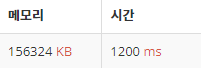

In [ ]:
import sys

input = sys.stdin.readline
n, s=map(int, input().split()) 
big=[0 for _ in range(n+1)]
val=[list(map(int, input().split())) for _ in range(n)]  
val.insert(0, [0, 0]) #인덱스와 그림 번호 맞추기 위함
val.sort() 
            
dp=[0 for _ in range(n+1)]

for i in range(1, n+1):
    big[i]=big[i-1]+1
    while big[i]<i: #조건 만족하는 그림 중 가장 높은 그림의 인덱스
        if val[i][0]-val[big[i]][0]<s: #조건 불만족
            break
        big[i]+=1 #조건 만족
    big[i]-=1
        
for i in range(1, n+1):
    dp[i]=(max(dp[i-1], dp[big[i]]+val[i][1]))
    
print(dp[n])

권소예  
:  
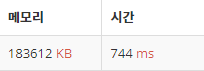

In [ ]:
import sys

input = sys.stdin.readline
n, s = map(int, sys.stdin.readline().split())

dd = [0] * (n + 1)  # i번째 그림을 무조건 전시한다고 할 때, 앞에 전시할 수 있는 가장 높은 그림의 번호를 저장
dy = [0] * (n + 1)  # dy[i]을 첫 번째부터 i번째 까지의 그림만을 고려했을 때의 정답
dict = []

for i in range(1, n + 1):
    dict.append(list(map(int, input().split())))  # 높이와 가격 input

dict.append([0,0])  # for문에서 i=1부터 시작하기 위해 추가
dict.sort(key=lambda x:x[0])  # 높이 값으로 정렬

for i in range(1, n+1):
    dd[i] = dd[i-1] + 1  # 바로 앞에있는 그림들 중에서 전시할 수 있는 가장 높은 번호의 그림
    while dd[i] < i:
        if dict[i][0]-dict[dd[i]][0] < s:  # 세로길이 차이가 s보다 작으면
            break
        dd[i] += 1
    dd[i] -=1

for i in range(1, n+1):
    dy[i] = dy[dd[i]] + dict[i][1]
    dy[i] = max(dy[i], dy[i-1])  # i번째 까지의 그림만을 고려했을 때 i번째 그림을 전시할 때의 값 혹은 i번째 그림을 전시하지 않을 때의 값 중 최대값

print(dy[n])

박태진  
:  
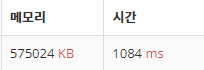

In [ ]:
#최대 높이 크기의 배열
import sys

numPic, isPic = map(int, sys.stdin.readline().split())
pictures = [0] * 20000001  # 최대 나올 수 있는 그림의 길이만큼의 배열 생성

end_ = 0
for i in range(numPic):
    h, c = map(int, sys.stdin.readline().split())
    # 가장 높은 길이의 그림을 이용하여 함수를 만들 것이므로 가장 높은 가격이 0이 아닌 그림의 길이를 저장
    end_ = h if end_ < h else end_
    # 해당 길이를 인덱스로하여 가격을 저장. 중복된다면 더 큰 가격으로 저장
    pictures[h] = c if pictures[h] < c else pictures[h] #결국 길이 당 가격 하나만 저장이 됨

dp = []  # dp table 형성


def maxPic(end):  # dp bottom-up
    for i in range(isPic):  # 0부터 그림이 아닌 범위(조건 미충족 그림)까지 그림의 인덱스를 dp table에 추가
        dp.append(pictures[i])

    for i in range(isPic, end + 1):  # isPic부터 최대 그림 길이인 end까지 반복문 실행
        # 확정적으로 그림인 i - isPic 번째의 최종 가격 합에 자신을 더한 것과, 자신의 직전의 최종 가격 합을 비교하여 더 큰 값을 dp table에 추가
        dp.append(max(dp[i - isPic] + pictures[i], dp[i - 1]))
    return dp[end]  # 최대 길이의 그림에 대한 최대 가격 합 반환


print(maxPic(end_))